In [35]:
import pandas as pd
import numpy as np
# pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
import matplotlib.pyplot as plt
%matplotlib inline
#
df1 = pd.read_csv('D:\Collection_Dataset\data\Topic_Survey_Assignment.csv')
# print(df1)
df_print = df1.copy()
df_print.index = df_print.iloc[:, 0]
df_print.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
df_print.index.names = ['']
display(df_print)

,Very interested,Somewhat interested,Not interested
,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


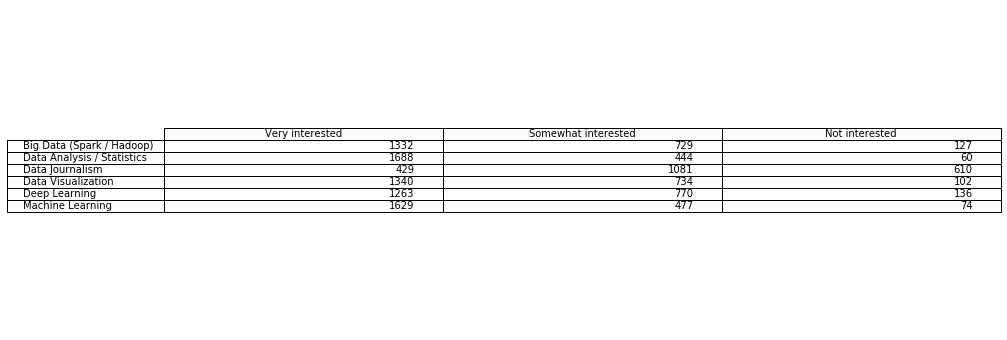

In [2]:
fig1 = plt.figure(figsize = (15,6))
ax0 = fig1.add_subplot(1, 1, 1)
#
#
content1 = np.array(df1.iloc[0:, 1:])
rowlabel1 = np.array(df1.iloc[:, 0])
collabel1 = np.array(df1.columns[1:])
#
ax0.table(cellText = content1, rowLabels = rowlabel1, colLabels = collabel1, loc = 'center')
ax0.axis('off')
#
fig1.canvas.draw()

In [3]:
# Note that the total number of respondents is 2233
df2 = df1.copy().sort_values(['Very interested'], ascending = False)
df2.index = df2['Unnamed: 0']
df2 = df2.drop(columns = ['Unnamed: 0'])/ 2233 # get percentage
print(type(df2))
print(df2)
""""""
# df2['check'] = df2[['Very interested', 'Somewhat interested', 'Not interested']].sum(axis = 1)
# print(df2)

<class 'pandas.core.frame.DataFrame'>
                            Very interested  Somewhat interested  \
Unnamed: 0                                                         
Data Analysis / Statistics         0.755934             0.198836   
Machine Learning                   0.729512             0.213614   
Data Visualization                 0.600090             0.328706   
Big Data (Spark / Hadoop)          0.596507             0.326467   
Deep Learning                      0.565607             0.344828   
Data Journalism                    0.192118             0.484102   

                            Not interested  
Unnamed: 0                                  
Data Analysis / Statistics        0.026870  
Machine Learning                  0.033139  
Data Visualization                0.045678  
Big Data (Spark / Hadoop)         0.056874  
Deep Learning                     0.060905  
Data Journalism                   0.273175  


''

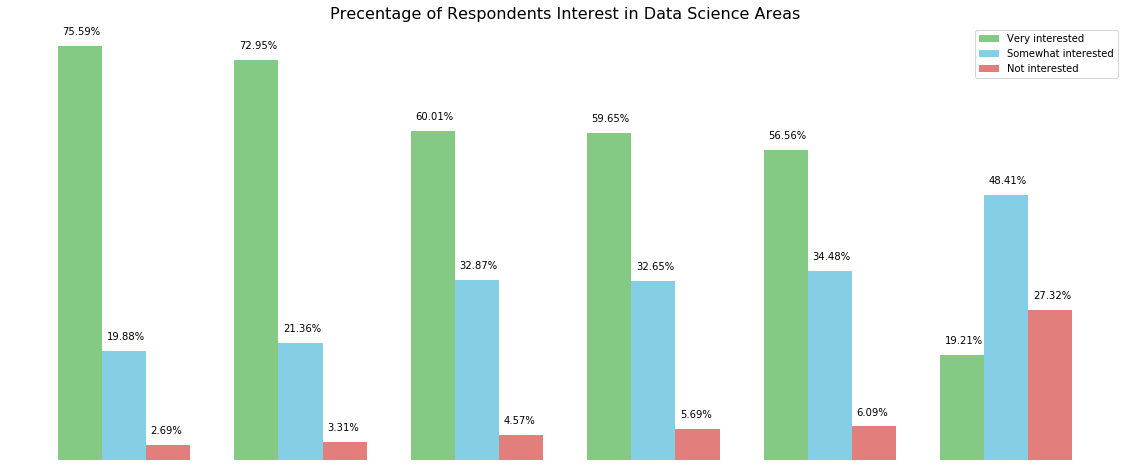

In [4]:
fig2 = plt.figure(figsize = (20,8))
ax_bar0 = fig2.add_subplot(1, 1, 1)
#
width0 = 0.25
alpha0 = 0.75
position0 = np.arange(len(df2))
# print(pos0)
legend0 = np.array(df2.columns)
# print(category0)
#
group0 = df2['Very interested']
group1 = df2['Somewhat interested']
group2 = df2['Not interested']
#
ax_bar0.bar(position0, width = width0, height = group0, 
            label = 'Very Interested', color = '#5cb85c', alpha = alpha0)
ax_bar0.bar(position0 + 0.25, width = width0, height = group1, 
            label = 'Somewhat Interested', color = '#5bc0de', alpha = alpha0)
ax_bar0.bar(position0 + 0.5, width = width0, height = group2, 
            label = 'Not Interested', color = '#d9534f', alpha = alpha0)
#
ax_bar0.set_xlabel('category', fontsize = 14)
ax_bar0.set_ylabel('percentage', fontsize = 14)
ax_bar0.set_title('Precentage of Respondents Interest in Data Science Areas', fontsize = 16)
ax_bar0.legend(legend0, loc = 'upper right')
ax_bar0.axis('off')
#
# def add_label(data):
#     """ 
#     add label for each bar in the chart 
#     """
#     for i, height in enumerate(data):
#         ax_bar0.text(x = i - 0.1, y = height + 0.02, s = str('{0:.2%}'.format(height)))
#
for i, height in enumerate(group0):
    ax_bar0.text(x = i - 0.10, y = height + 0.02, s = str('{0:.2%}'.format(height)))
for i, height in enumerate(group1):
    ax_bar0.text(x = i - 0.10 + 0.25, y = height + 0.02, s = str('{0:.2%}'.format(height)))
for i, height in enumerate(group2):
    ax_bar0.text(x = i - 0.10 + 0.5, y = height + 0.02, s = str('{0:.2%}'.format(height)))
#
# add_label(group0)
# add_label(group1)
# add_label(group2)
#
fig2.canvas.draw()

In [32]:
df2 = pd.read_csv('D:\Collection_Dataset\data\police_incidents.csv')
# print(df2)
display(df2.head())
df2_group = df2.groupby(['PdDistrict']).\
agg({'IncidntNum': np.count_nonzero}).sort_values('IncidntNum', ascending = False)
# df2_group = df2.groupby(['PdDistrict']).sum()
display(df2_group)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


,IncidntNum
PdDistrict,
SOUTHERN,28445
NORTHERN,20100
MISSION,19503
CENTRAL,17666
BAYVIEW,14303
INGLESIDE,11594
TARAVAL,11325
TENDERLOIN,9942
RICHMOND,8922


In [6]:
df2 = df2.head(500)
print(df2.shape)
#
import folium
latitude = 37.77
longitude = -122.42
#
# sf_map = folium.Map(location = [56.130, -106.35], zoom_start = 12, tiles = 'Stamen Terrain')
# sf_map = folium.Map(location = [latitude, longitude], zoom_start = 12, tiles = 'Stamen Toner')
sf_map = folium.Map(location = [latitude, longitude], zoom_start = 12, tiles = 'OpenStreetMap') #
#
incidents = folium.map.FeatureGroup()
#
for lat, long in zip(df2['X'], df2['Y']):
    incidents.add_child(
        folium.CircleMarker([lat, long], radius = 500, color = 'green', 
                                    fill = True, fill_color = 'blue', fill_capacity = 0.6 ))
sf_map.add_child(incidents)
# for lat, long, label in zip(df2['X'], df2['Y'], df2['Category']):
#     folium.features.CircleMarker([lat, long], radius = 5, 
#                                 color = 'yellow', fill = True)
#
# sf_map

(500, 13)


In [7]:
test = 0.765
print(test)
print('This is a test {0:.2f}'.format(test))
print('This is a test {0:.2%}'.format(test))

0.765
This is a test 0.77
This is a test 76.50%


In [11]:
df2 = df2.head(500)
print(df2.shape)
"""
This section demonstrates different types of marker that can be added to maps under Folium
"""
#
import folium
latitude = 37.77
longitude = -122.42
#
# sf_map = folium.Map(location = [56.130, -106.35], zoom_start = 12, tiles = 'Stamen Terrain')
# sf_map = folium.Map(location = [latitude, longitude], zoom_start = 12, tiles = 'Stamen Toner')
sf_map = folium.Map(location = [latitude, longitude], zoom_start = 12, tiles = 'OpenStreetMap') #
#
#
trigger = 'click me'
folium.Marker([latitude + 0.01, longitude + 0.01], 
              popup = '<i>Test Message</i>', tooltip = trigger).add_to(sf_map) # add marker on map
#
folium.Marker([latitude - 0.02, longitude - 0.02], 
              popup = '<i>Test Message</i>', tooltip = trigger,
              icon = folium.Icon(color = 'red', icon = 'info-sign')).add_to(sf_map) # add marker on map
#
folium.Marker([latitude + 0.05, longitude + 0.05], 
              popup = '<i>Test Message</i>', tooltip = trigger,
              icon = folium.Icon(color = 'blue', icon = 'cloud')).add_to(sf_map) # add marker on map
#
folium.CircleMarker([latitude - 0.05, longitude + 0.05], radius = 50, color = 'red', 
              popup = '<i>Test Message</i>', tooltip = trigger,
              fill = True, fill_color = 'yellow').add_to(sf_map) # add marker on map

sf_map # to show the map drawn
# sf_map.save('C:/Users/willi/Desktop/test1.html')
#
# from branca.element import Figure # for resizing the map
# fig = Figure(width = 500, height = 300)
# fig.add_child(sf_map)
# fig

(500, 13)


In [9]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemp = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemp)
#
# display(state_data)
print(state_geo)
# display(state_data[['State', 'Unemployment']])
print(state_data.columns)
"""
This secion demonstrates a simple heatmap with folium
"""
#
m1 = folium.Map(location = [48, -102], zoom_start = 3, width = 500, height = 300, control_sale = True)
#
folium.Choropleth(geo_data = state_geo,
                 name = 'choropleth',
                 data = state_data, 
                 columns = ['State', 'Unemployment'],
                 key_on = 'feature.id',
                 fill_color = 'YlGn', 
                 fill_opacity = 0.6, 
                 line_opacity = 0.5, 
                 legend_name = 'Unemployment Rate').add_to(m1)
#
folium.LayerControl().add_to(m1)
m1

https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json
Index(['State', 'Unemployment'], dtype='object')


In [34]:
import os
os.chdir('D:\Collection_Dataset\data')
import json
# load geojson file 
    # note that shapefiles can be vonverted to geojson with QGIS
with open('san-francisco.geojson') as f:
    geojson_sf = json.load(f) # 
#
for i in geojson_sf['features']:
#     print(i)
#     print(i['properties'])
#     print(i['properties']['DISTRICT'])
    i['id'] = i['properties']['DISTRICT']
# print(geojson_sf)
#
state_data = df2_group.copy()
state_data['district'] = state_data.index
display(state_data)
#
latitude = 37.77
longitude = -122.42
# display(state_data[['State', 'Unemployment']])
# print(state_data.columns)
#
m1 = folium.Map(location = [latitude, longitude], zoom_start = 12)
# add geojson file to map
folium.GeoJson('san-francisco.geojson', name = 'geojson_sf').add_to(m1)
# add layer control to map
# folium.LayerControl().add_to(m1)
#
folium.Choropleth(geo_data = geojson_sf,
                 name = 'choropleth',
                 data = state_data, 
                 columns = ['district', 'IncidntNum'],
                 key_on = 'feature.id',
                 fill_color = 'YlOrRd', 
                 fill_opacity = 0.6, 
                 line_opacity = 0.5, 
                 legend_name = 'Incident Number',
                 highlight = True ).add_to(m1)
# 
""" layer control to turn choropleth on or off """
folium.LayerControl().add_to(m1) 
m1

,IncidntNum,district
PdDistrict,,
SOUTHERN,28445,SOUTHERN
NORTHERN,20100,NORTHERN
MISSION,19503,MISSION
CENTRAL,17666,CENTRAL
BAYVIEW,14303,BAYVIEW
INGLESIDE,11594,INGLESIDE
TARAVAL,11325,TARAVAL
TENDERLOIN,9942,TENDERLOIN
RICHMOND,8922,RICHMOND
